In [ ]:
#Name: Arundarasi Rajendran
#PRN: 18070122081
#Batch: 2018-22, CS

In [2]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
#Loading dataset
df = pd.read_csv('Bank_Customer_Churn_dataset.csv')

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.shape

(10000, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [9]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [10]:
df.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [11]:
#Data preprocessing

#Surname, rownumber and customerid is not needed
#because it will impact the final prediction
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [12]:
df.head(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [13]:
#Label encoding gender and geography columns

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

df['Gender']= label_encoder.fit_transform(df['Gender'])
df['Geography']= label_encoder.fit_transform(df['Geography'])

In [14]:
df.head(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1


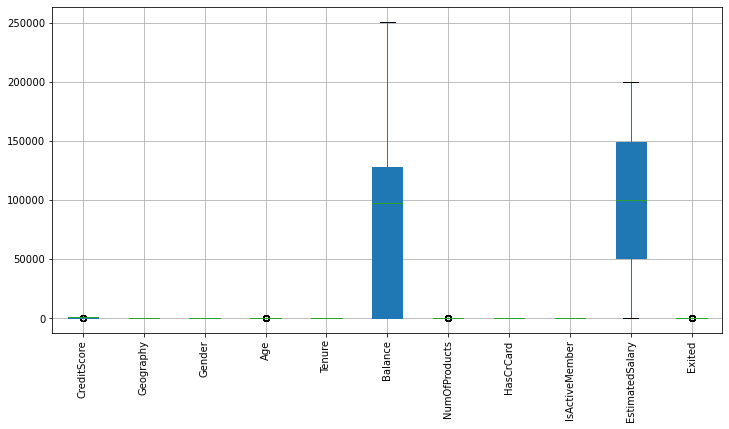

In [47]:
#Exploratory Data Analysis

#detecting outliers
plt.figure(figsize=(12,6))
bplot = df.boxplot(patch_artist=True)
plt.xticks(rotation=90)       
plt.show()

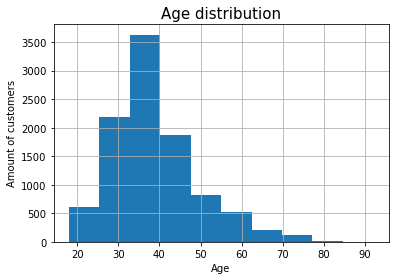

In [16]:
df['Age'].hist()
plt.xlabel('Age')
plt.ylabel('Amount of customers')
plt.title("Age distribution", fontsize=15)
plt.show()

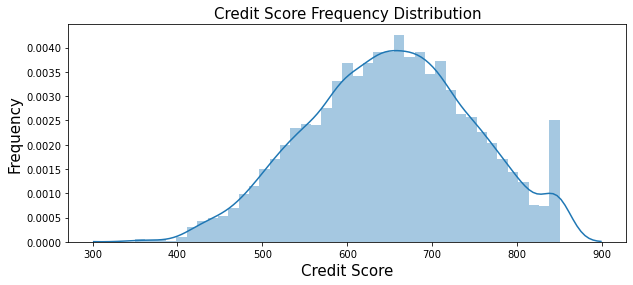

In [36]:
plt.figure(figsize=(10, 4))
sns.distplot(df.CreditScore)
plt.ylabel('Frequency', fontsize=15)
plt.xlabel('Credit Score', fontsize=15)
plt.title('Credit Score Frequency Distribution', fontsize=15)
plt.show()

<Figure size 720x288 with 0 Axes>

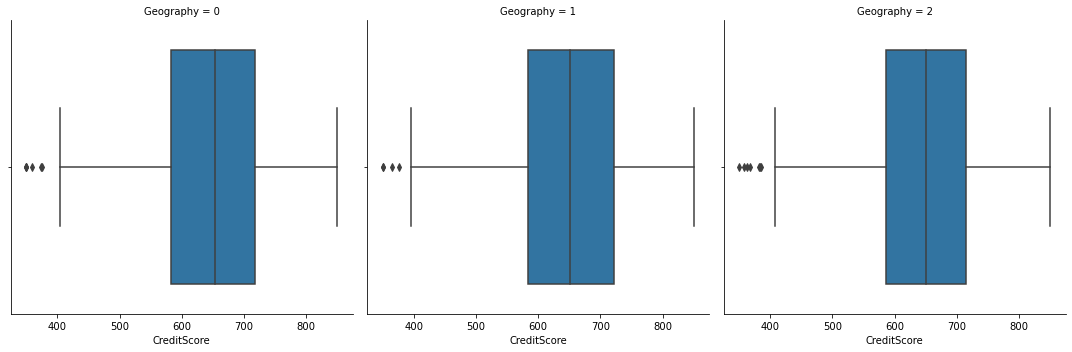

In [35]:
plt.figure(figsize=(10, 4))
sns.catplot(kind='box', x='CreditScore', data=df, col='Geography')

<Figure size 720x288 with 0 Axes>

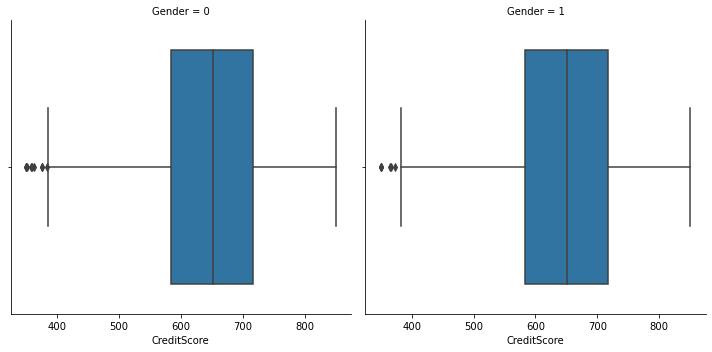

In [34]:
plt.figure(figsize=(10, 4))
sns.catplot(kind='box', x='CreditScore', data=df, col='Gender')

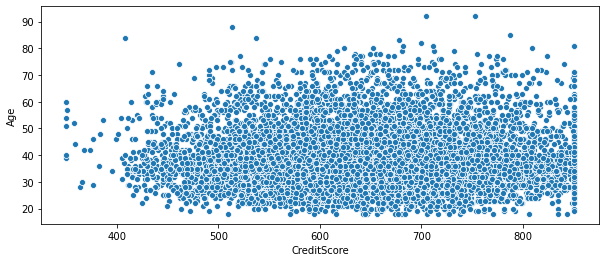

In [33]:
plt.figure(figsize=(10, 4))
sns.scatterplot(x='CreditScore', data=df, y='Age')

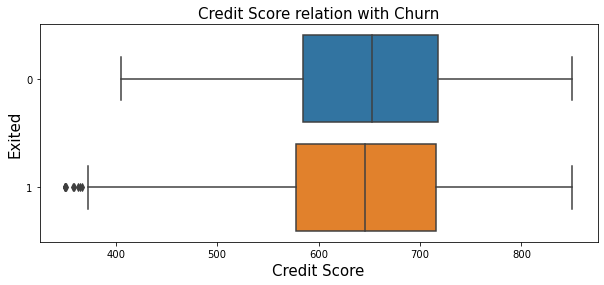

In [32]:
plt.figure(figsize=(10, 4))
sns.boxplot(x='CreditScore', y='Exited', data=df, orient='h')
plt.xlabel('Credit Score', fontsize=15)
plt.ylabel('Exited', fontsize=15)
plt.title('Credit Score relation with Churn', fontsize=15)
plt.show()

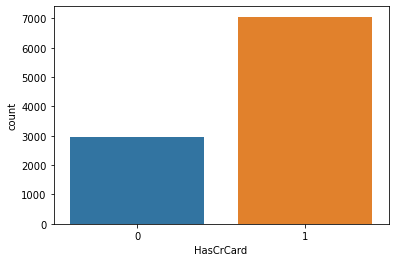

In [31]:
sns.countplot(x=df.HasCrCard)

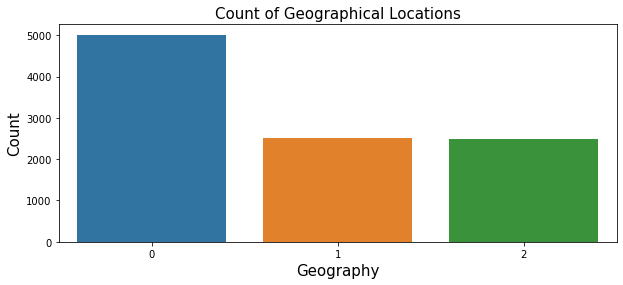

In [30]:
plt.figure(figsize=(10, 4))
sns.countplot(x=df.Geography)
plt.xlabel('Geography', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Count of Geographical Locations', fontsize=15)
plt.show()
#0 - France
#1 - Germany
#2 - Spain

Text(0, 0.5, 'Count')

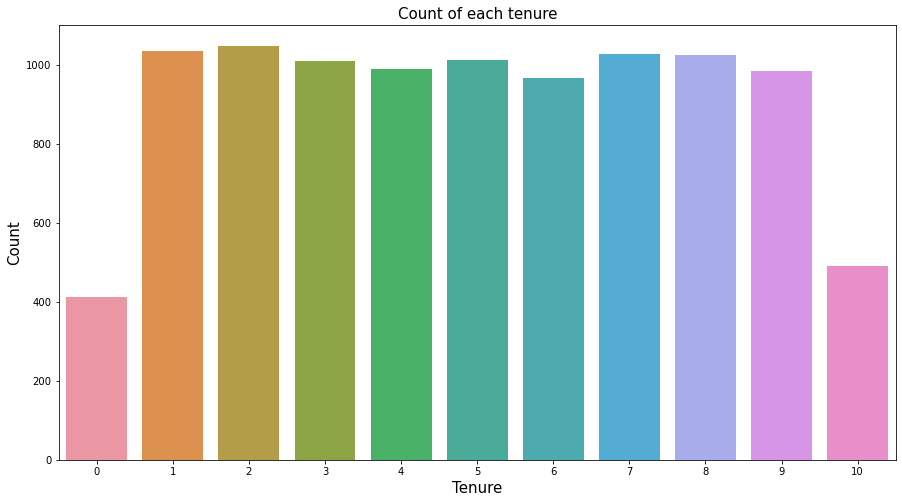

In [27]:
plt.figure(figsize=(15, 8))
sns.countplot(x=df.Tenure)
plt.title('Count of each tenure', fontsize=15)
plt.xlabel('Tenure', fontsize=15)
plt.ylabel('Count', fontsize=15)

<Figure size 1080x576 with 0 Axes>

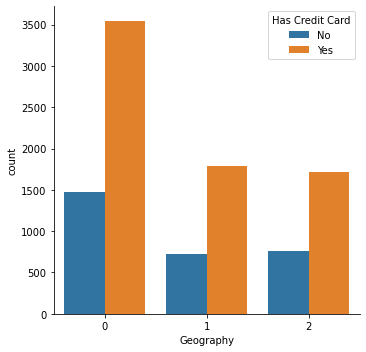

In [28]:
plt.figure(figsize=(15, 8))
sns.catplot(kind='count', x='Geography', hue='HasCrCard', data=df, legend=False)
plt.legend(title='Has Credit Card', labels=['No', 'Yes'])
plt.show()

([<matplotlib.axis.YTick at 0x11df938b0>,
 <a list of 4 Text major ticklabel objects>)

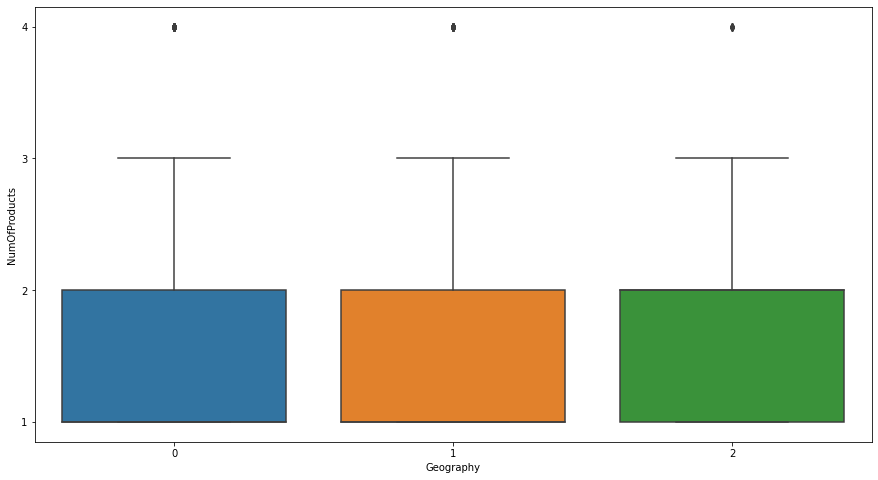

In [29]:
plt.figure(figsize=(15, 8))
sns.boxplot(x='Geography', y='NumOfProducts', data=df)
plt.yticks([1, 2, 3, 4])

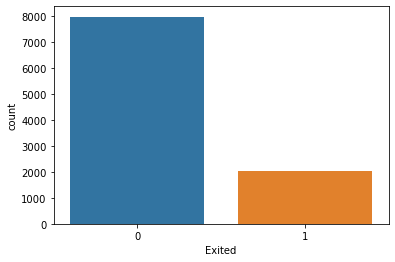

In [15]:
#checking whether dataset is balanced or not
import seaborn as sns
sns.countplot(df['Exited'])

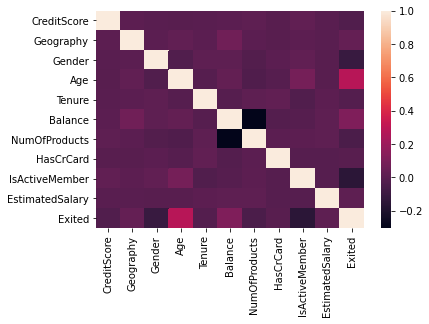

In [16]:
#checking correlation between features
corr = df.corr()
sns.heatmap(corr)

In [37]:
#Split dataset

X = df.drop('Exited',axis = 1)
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10


In [38]:
Y = pd.DataFrame(df['Exited'])
Y.head()

,Exited
0,1
1,0
2,1
3,0
4,0


In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
print("X train: ",X_train.shape)
print("X test: ",X_test.shape)
print("Y train: ",Y_train.shape)
print("Y test: ",Y_test.shape)

X train:  (8000, 10)
X test:  (2000, 10)
Y train:  (8000, 1)
Y test:  (2000, 1)


In [40]:
#Implementing ML Models

#Logistic Regression

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,Y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [41]:
predict = model.predict(X_test)
predict

array([0, 0, 0, ..., 0, 0, 0])

In [49]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print(classification_report(Y_test, predict))
print(confusion_matrix(Y_test, predict))
a = accuracy_score(Y_test, predict)
print(a)

              precision    recall  f1-score   support

           0       0.80      0.98      0.88      1585
           1       0.35      0.04      0.07       415

    accuracy                           0.79      2000
   macro avg       0.58      0.51      0.48      2000
weighted avg       0.70      0.79      0.71      2000

[[1554   31]
 [ 398   17]]
0.7855


In [43]:
#Random Forest

from sklearn.ensemble import RandomForestClassifier

In [48]:

RF = RandomForestClassifier(n_estimators = 200, random_state=200)
RF.fit(X_train, Y_train)
RF_pred = RF.predict(X_test)
b = accuracy_score(RF_pred, Y_test)
b

<ipython-input-48-26c8cc6ca0ed>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF.fit(X_train, Y_train)


0.862

In [45]:
print(classification_report(Y_test,RF_pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1585
           1       0.81      0.44      0.57       415

    accuracy                           0.86      2000
   macro avg       0.84      0.71      0.74      2000
weighted avg       0.86      0.86      0.85      2000



In [46]:
print(confusion_matrix(Y_test, RF_pred))

[[1542   43]
 [ 233  182]]


In [51]:
#Model comparison

models = pd.DataFrame({
    'Model': ['Logistic Regression',  'Random Forest'],
    'Accuracy':[a,b]})
models.sort_values(by='Accuracy',ascending=False)

,Model,Accuracy
1,Random Forest,0.8620
0,Logistic Regression,0.7855


In [52]:
#Random Forest the best performing model so lets predict the outcome of test dataset using Random forest 

Final_prediction = pd.DataFrame(RF_pred, columns=['Exited'])
Final_prediction

,Exited
0,0
1,0
2,0
3,0
4,0
...,...
1995,0
1996,1
1997,0
1998,0
